# House Prices Prediction 

## Import the library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

## Load the dataset

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df= pd.read_csv('./data/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df= train_df.drop('Id',axis=1)

In [4]:
print(train_df.shape)

(1460, 80)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


These statistics assist in identifying outliers, assessing the spread of data, and guiding decisions on normalization or scaling.

In [7]:
columns = train_df.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Data Preprocessing


Let's visualize eatch numerical feature with our target (SalePrice)

In [8]:
df = train_df

we intreset just about : square footage and number of bedrooms and bathrooms.
so we will not process all the features

In [9]:
# grap the interesting features
interested_features = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','GarageArea', 'TotalBsmtSF', 'FullBath', 'HalfBath','BsmtHalfBath','BsmtFullBath','BedroomAbvGr']

In [10]:
train_df = train_df[interested_features]
test_df = test_df[interested_features[1:]]

In [11]:
train_df.head()

,SalePrice,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,GrLivArea,GarageArea,TotalBsmtSF,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,BedroomAbvGr
0,208500,856,854,706,0,1710,548,856,2,1,0,1,3
1,181500,1262,0,978,0,1262,460,1262,2,0,1,0,3
2,223500,920,866,486,0,1786,608,920,2,1,0,1,3
3,140000,961,756,216,0,1717,642,756,1,0,0,1,3
4,250000,1145,1053,655,0,2198,836,1145,2,1,0,1,4


In [12]:
num_columns = train_df.dtypes[train_df.dtypes != 'object']
categorical_columns = train_df.dtypes[train_df.dtypes == 'object']

print("num_columns : ", num_columns.count())
print("categorical_columns : ", categorical_columns.count())

num_columns :  13
categorical_columns :  0


<Axes: >

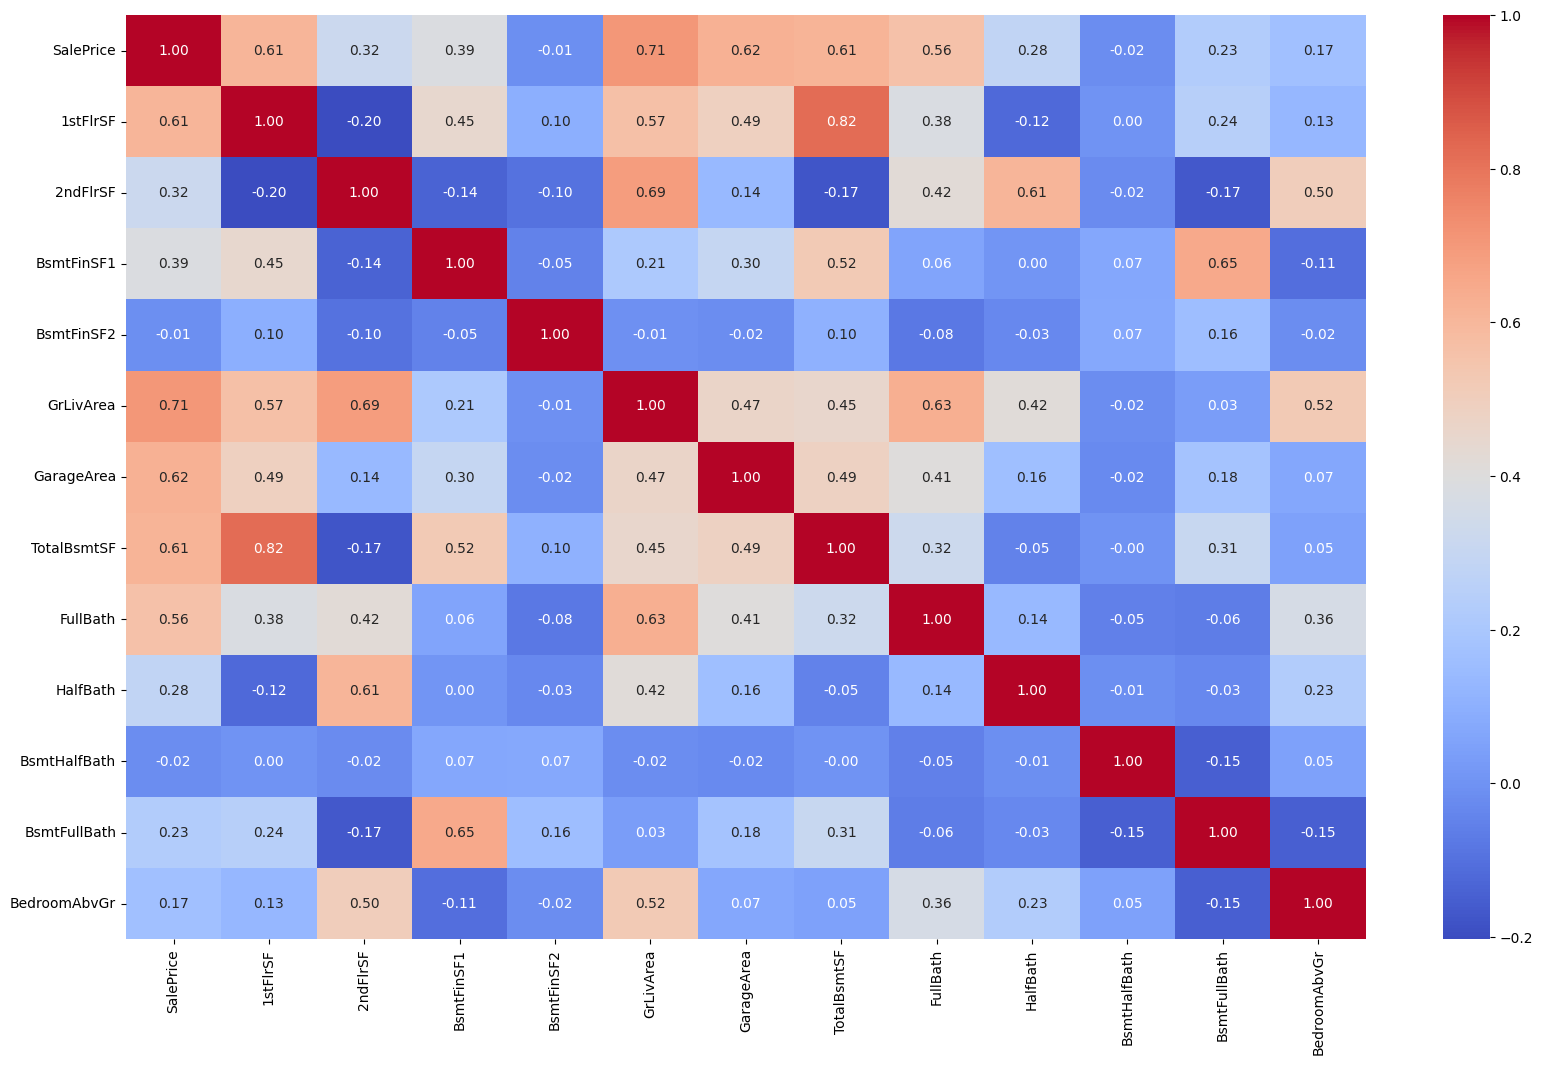

In [13]:
# tracer la matrice de correlation
correlation_matrix = train_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

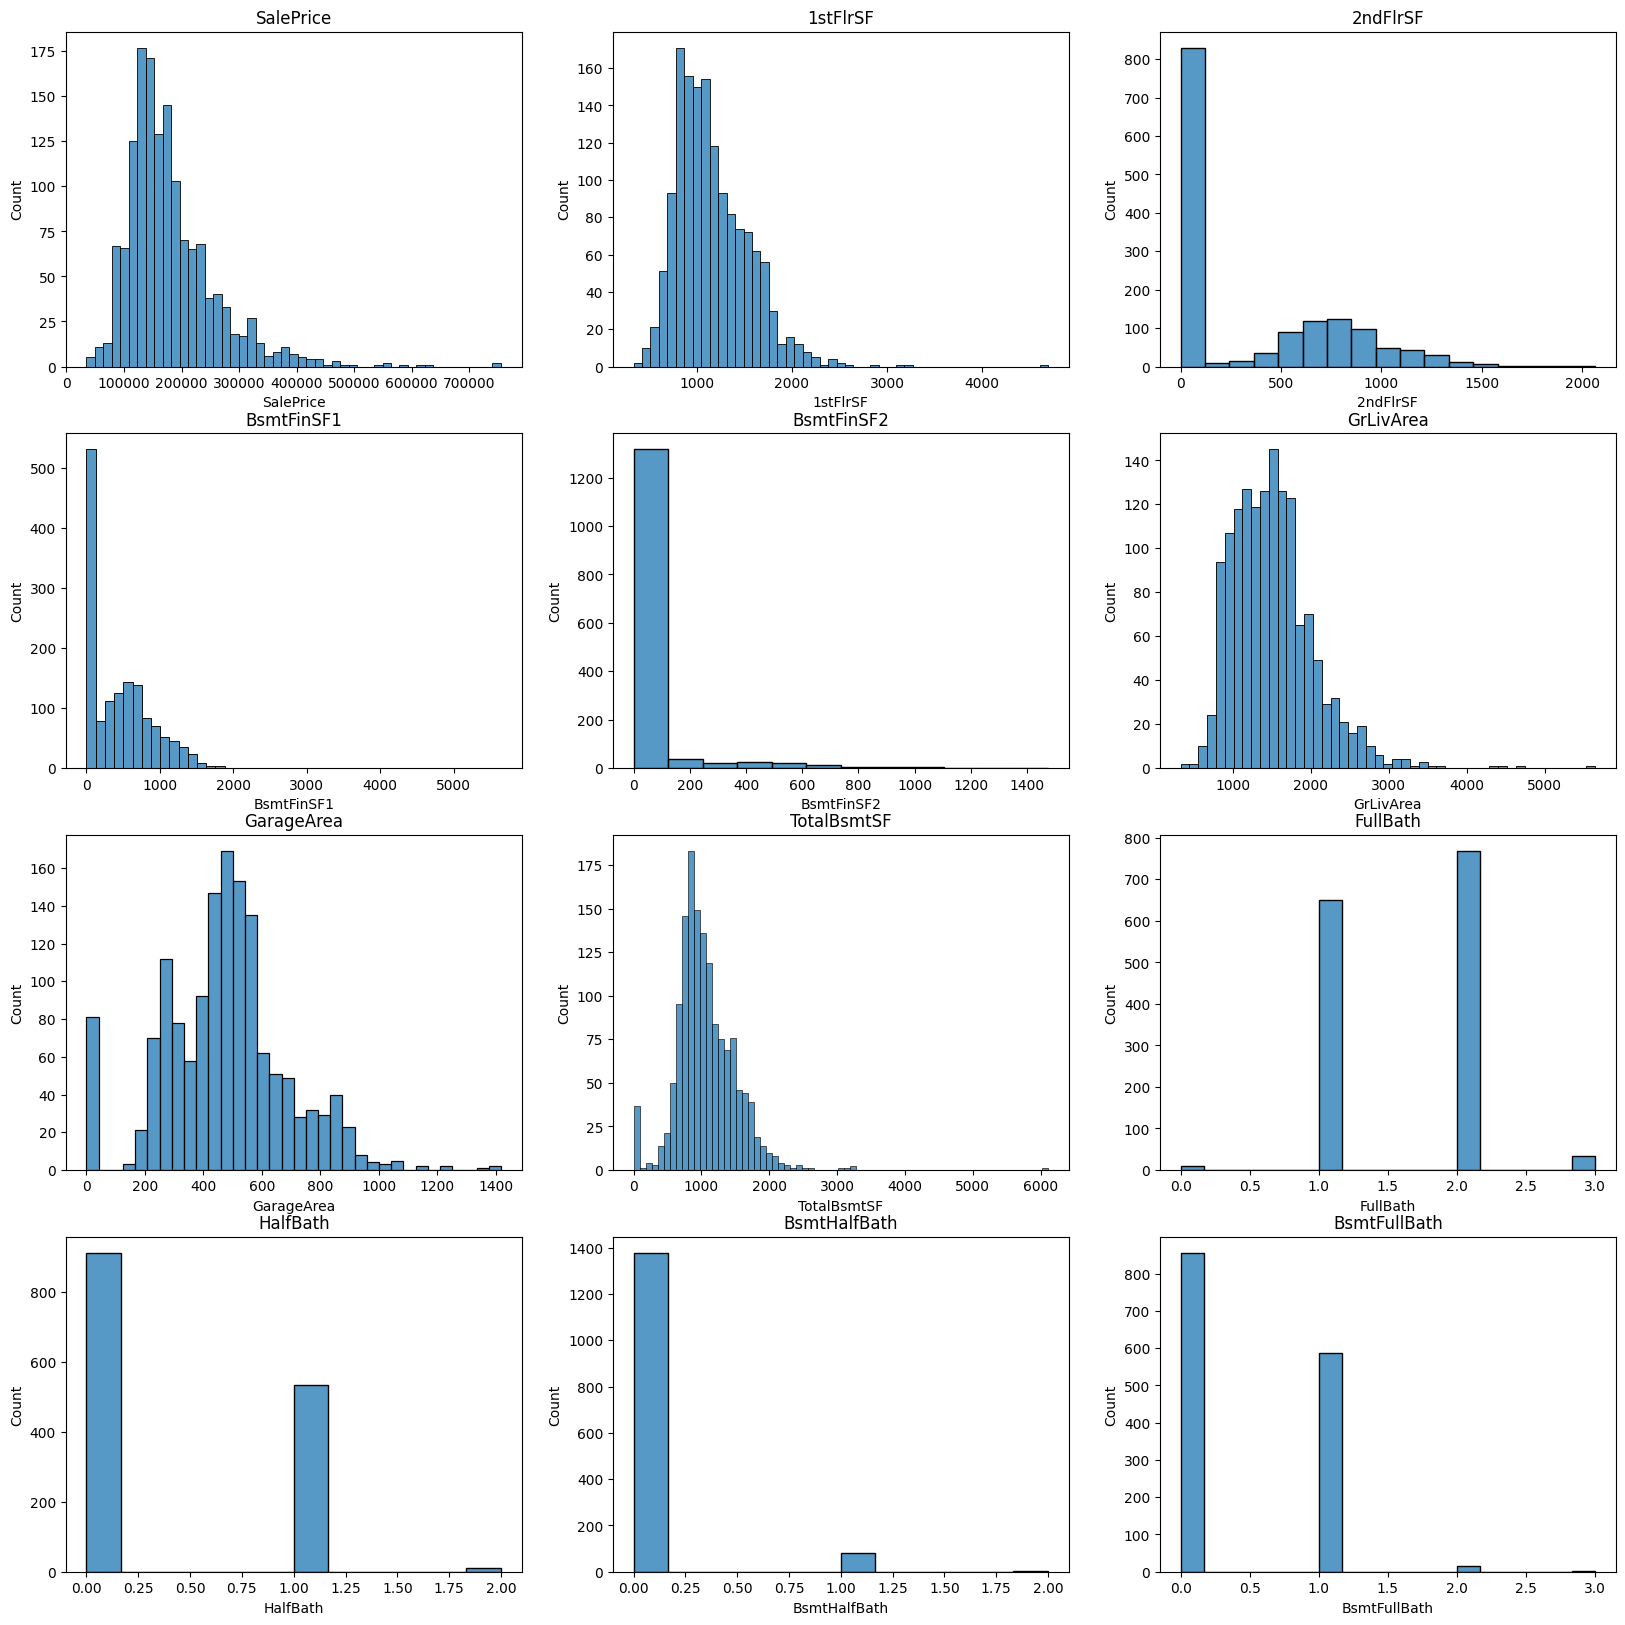

In [14]:
# visualize the distribution of each feature

fig, ax = plt.subplots(4,3, figsize=(20,20))
for i, ax in enumerate(ax.flat):
    if i < len(interested_features):
        sns.histplot(train_df[interested_features[i]], ax=ax)
        ax.set_title(interested_features[i])

In [15]:
# train_df.query('1stFlrSF > 3000')

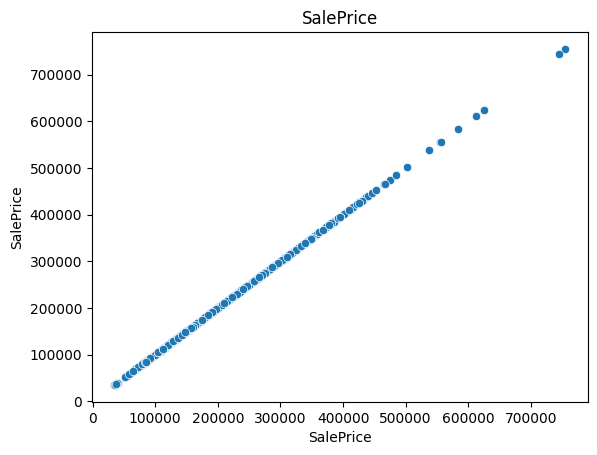

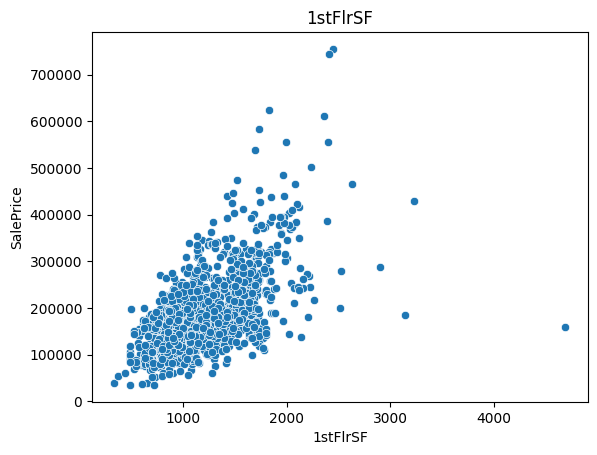

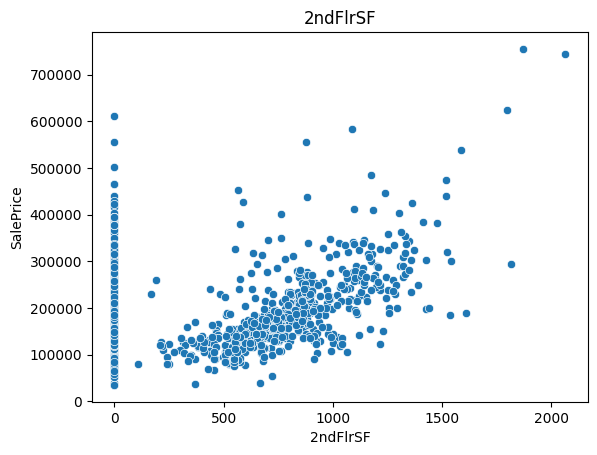

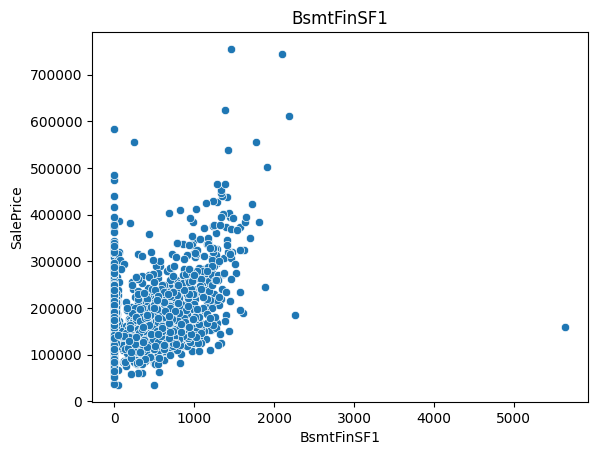

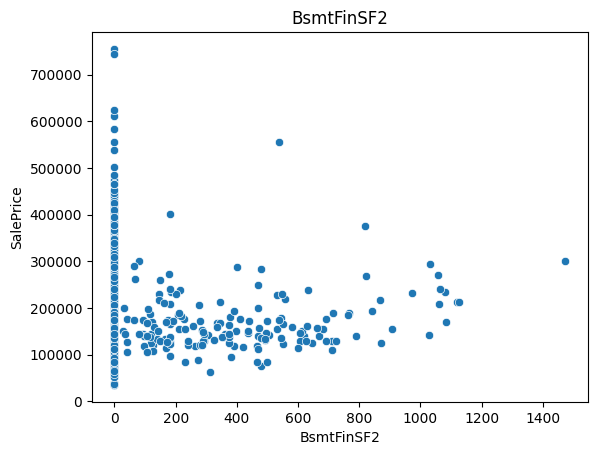

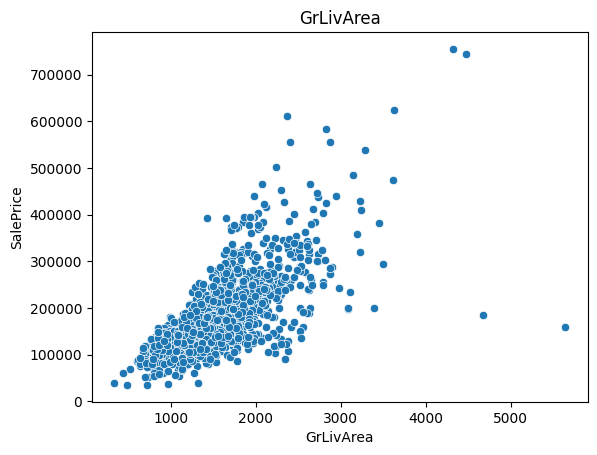

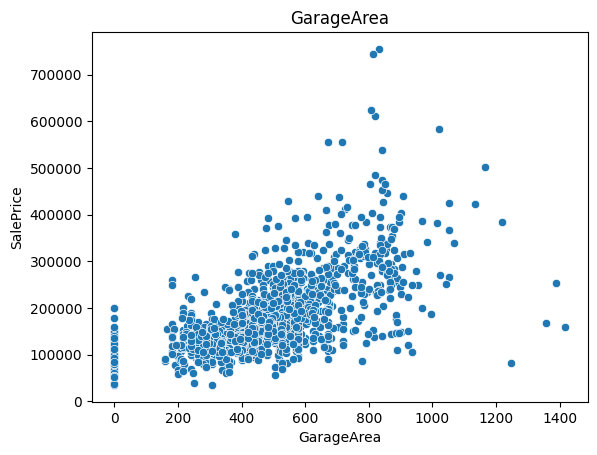

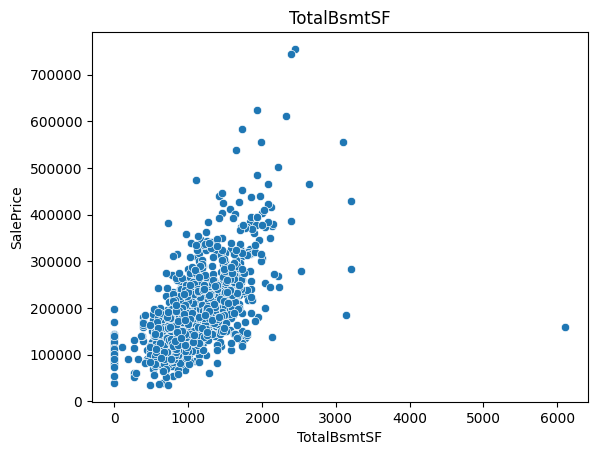

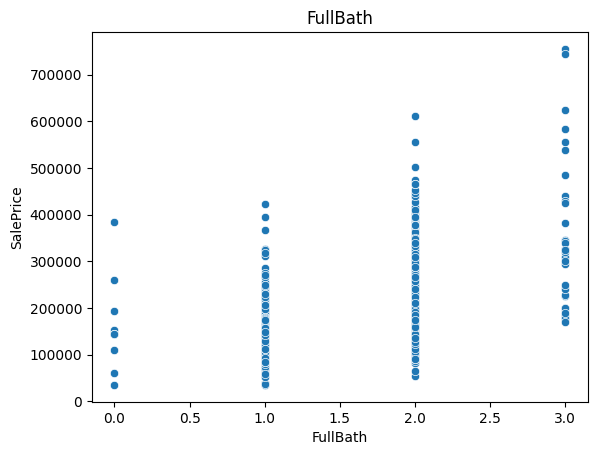

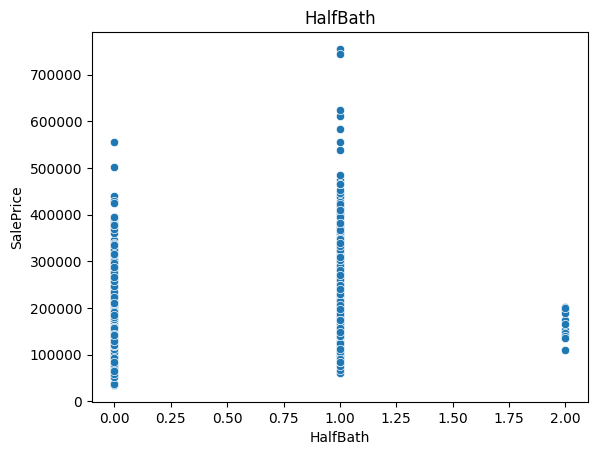

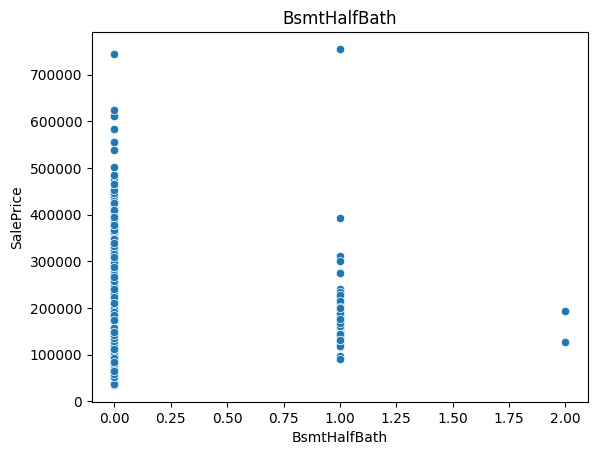

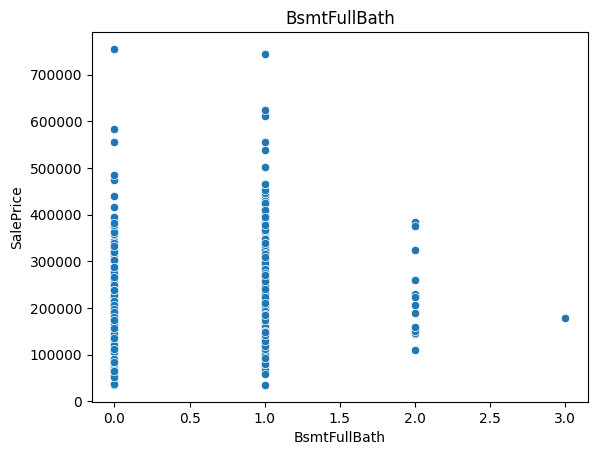

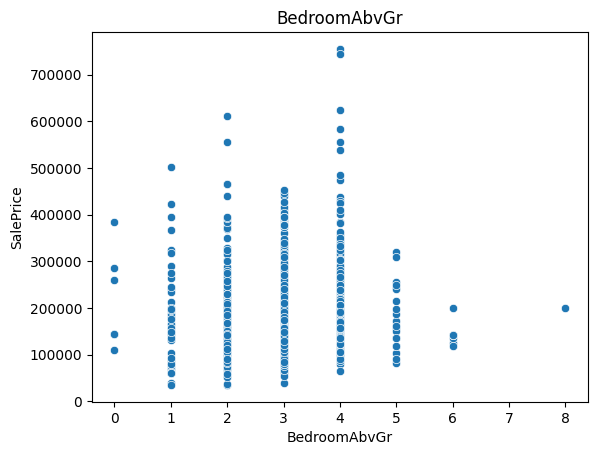

In [16]:
# loop over num_columns and plot the scatter plot
for col in num_columns.index:
    plt.figure()
    plt.title(col)
    sns.scatterplot(x=col, y='SalePrice', data=train_df)

In [17]:
# Queries

# train_df.query('1stFlrSF > 3000')
# train_df.query('2stFlrSF > 1500')
# train_df.query('BsmtFinSF1 > 3000')
# train_df.query('BsmtFinSF2 > 1400')
# train_df.query('GrLivArea > 4000')
# train_df.query('TotalBsmtSF > 4000')
# train_df.query('HalfBath == 2')
# train_df.query('BsmtHalfBath == 2')
# train_df.query('BsmtFullBath == 3')
# train_df.query('BedroomAbvGr == 8')

<Axes: xlabel='SalePrice', ylabel='Count'>

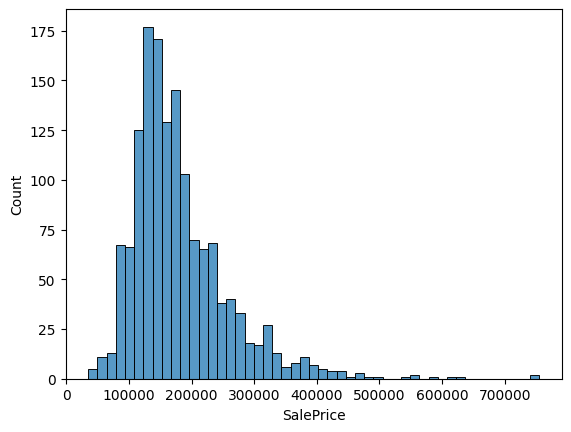

In [18]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [19]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17796\2970688189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['SalePrice'] = np.log1p(train_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Count'>

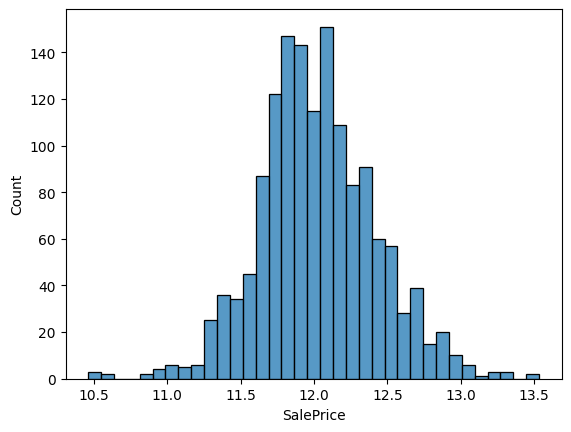

In [20]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [21]:
# Feature Engineering
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] +  (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] +  (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17796\484355222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17796\484355222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17796\484355222.py:8: SettingWithCopyWarning: 
A valu

In [22]:
train_df = train_df.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF', 'FullBath', 'HalfBath','BsmtHalfBath','BsmtFullBath'])
test_df = test_df.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF', 'FullBath', 'HalfBath','BsmtHalfBath','BsmtFullBath'])


In [23]:
train_df.head()

,SalePrice,GarageArea,BedroomAbvGr,totalsf,totalarea,totalbaths
0,12.247699,548,3,2416,2566,4
1,12.109016,460,3,2240,2524,3
2,12.317171,608,3,2272,2706,4
3,11.849405,642,3,1933,2473,2
4,12.429220,836,4,2853,3343,4


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   GarageArea    1460 non-null   int64  
 2   BedroomAbvGr  1460 non-null   int64  
 3   totalsf       1460 non-null   int64  
 4   totalarea     1460 non-null   int64  
 5   totalbaths    1460 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 68.6 KB


it's look there is some rows that could affect the result
Let's 

In [25]:
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [29]:
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Make predictions on the test data
predictions = model.predict(X_test)


In [31]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.044261811182432435


In [32]:
# calcul the RMSE and the R2
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)

print("RMSE : ", rmse)
print("R2 : ", r2)

RMSE :  0.21038491196479
R2 :  0.7628124071519221


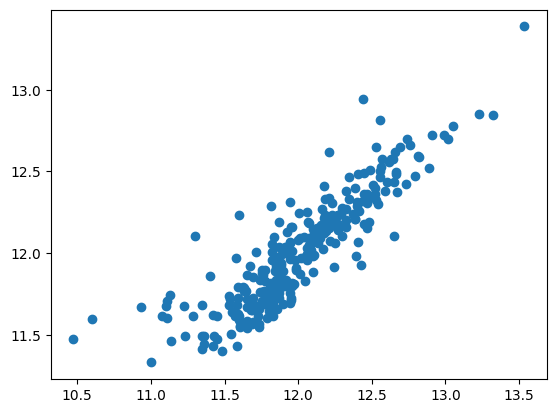

In [33]:
# trace linear regression of predictions and y_test
plt.scatter(y_test, predictions)

The model is not well perform, still need more work.



`Will be back later, this is just the beginning.`